In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2


import flotilla
study = flotilla.embark('singlecell_pnm_figure6_splicing_correlation_track_examples', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2017-01-12 09:55:42	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure6_splicing_correlation_track_examples/datapackage.json
2017-01-12 09:55:42	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-12 09:56:28 	Initializing Study
2017-01-12 09:56:28 	Initializing Predictor configuration manager for Study
2017-01-12 09:56:28	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-12 09:56:28	Added ExtraTreesClassifier to default predictors
2017-01-12 09:56:28	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-12 09:56:28	Added ExtraTreesRegressor to default predictors
2017-01-12 09:56:28	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-12 09:56:28	Added Gradie

Error loading species hg19 data: HTTP Error 404: Not Found

In [2]:
folder = 'figures'

In [3]:
figure_folder = 'figures/016_bimodal_correlations_pca'
! mkdir -p $figure_folder

In [4]:
splicing_expression_corr_tidy = study.supplemental.splicing_expression_corr
splicing_expression_corr_tidy = splicing_expression_corr_tidy.loc[splicing_expression_corr_tidy['Pearson R'].abs() > 0.5]
splicing_expression_corr_tidy = splicing_expression_corr_tidy.join(study.expression.feature_data['gene_name'], on='Expression Gene')
splicing_expression_corr_tidy['Correlation Direction'] = splicing_expression_corr_tidy['Pearson R'].map(
    lambda x: '(+) Positive' if x > 0 else '(-) Negative')
print(splicing_expression_corr_tidy.shape)
splicing_expression_corr_tidy.head()

(3011, 8)


,Splicing Gene,phenotype,Expression Gene,Pearson R,event_id,modality,gene_name,Correlation Direction
66,BRD8-event1,NPC,ENSG00000005436,-0.538949,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GCFC2,(-) Negative
176,BRD8-event1,NPC,ENSG00000010310,-0.519802,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GIPR,(-) Negative
483,BRD8-event1,NPC,ENSG00000050438,-0.509080,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SLC4A8,(-) Negative
875,BRD8-event1,NPC,ENSG00000073060,-0.602362,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SCARB1,(-) Negative
1277,BRD8-event1,NPC,ENSG00000088682,-0.588166,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,COQ9,(-) Negative


In [5]:
splicing_events = (('BRD8-event1', 'exon:chr5:137495758-137495862:- exon:chr5:137495244-137495288:- exon:chr5:137492571-137492956:-'),
                   ('BRD8-event2', 'exon:chr5:137500009-137500102:- exon:chr5:137499776-137499822:- exon:chr5:137498819-137499033:-'),
                   ("DYNC1I2", 'exon:chr2:172563743-172563887:+ exon:chr2:172569277-172569336:+ exon:chr2:172571838-172571878:+'),
                   ('EIF5', 'exon:chr14:103800339-103800597:+ exon:chr14:103800726-103800934:+ exon:chr14:103801990-103802269:+'),
                   ('EIF6', 'exon:chr20:33871979-33872295:- exon:chr20:33868457-33868632:- exon:chr20:33867745-33867921:-'),
                   ("MDM4", 'exon:chr1:204501319-204501374:+ exon:chr1:204506558-204506625:+ exon:chr1:204507337-204507436:+'),
                   ("MEAF6", 'exon:chr1:37967405-37967597:- exon:chr1:37962308-37962337:- exon:chr1:37961475-37961519:-'),
                   ("RPN2", 'exon:chr20:35864983-35865112:+ exon:chr20:35866805-35866852:+ exon:chr20:35869706-35869820:+'),
                   ('SUGT1', 'exon:chr13:53233314-53233384:+ exon:chr13:53235610-53235705:+ exon:chr13:53236784-53236837:+'),
                   ('PKM', 'exon:chr15:72499069-72499221:-@exon:chr15:72495363-72495529:-@exon:chr15:72494795-72494961:-@exon:chr15:72492815-72492996:-'),
                   ('SNAP25', 'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'),
                   ('SMARCE1', 'exon:chr17:38801828-38801871:- exon:chr17:38798707-38798811:- exon:chr17:38793744-38793824:-'))

splicing_events = list(((x, '@'.join(y.split())) for x, y in splicing_events))
splicing_events

[('BRD8-event1',
  'exon:chr5:137495758-137495862:-@exon:chr5:137495244-137495288:-@exon:chr5:137492571-137492956:-'),
 ('BRD8-event2',
  'exon:chr5:137500009-137500102:-@exon:chr5:137499776-137499822:-@exon:chr5:137498819-137499033:-'),
 ('DYNC1I2',
  'exon:chr2:172563743-172563887:+@exon:chr2:172569277-172569336:+@exon:chr2:172571838-172571878:+'),
 ('EIF5',
  'exon:chr14:103800339-103800597:+@exon:chr14:103800726-103800934:+@exon:chr14:103801990-103802269:+'),
 ('EIF6',
  'exon:chr20:33871979-33872295:-@exon:chr20:33868457-33868632:-@exon:chr20:33867745-33867921:-'),
 ('MDM4',
  'exon:chr1:204501319-204501374:+@exon:chr1:204506558-204506625:+@exon:chr1:204507337-204507436:+'),
 ('MEAF6',
  'exon:chr1:37967405-37967597:-@exon:chr1:37962308-37962337:-@exon:chr1:37961475-37961519:-'),
 ('RPN2',
  'exon:chr20:35864983-35865112:+@exon:chr20:35866805-35866852:+@exon:chr20:35869706-35869820:+'),
 ('SUGT1',
  'exon:chr13:53233314-53233384:+@exon:chr13:53235610-53235705:+@exon:chr13:53236784

## Interesting genes to correlate

In [6]:
single_metadata = study.metadata.data.query('single == True')

outlier_colors = pd.Series(['lightgrey' if x else 'black' for x in single_metadata['outlier']], 
                           index=single_metadata.index)
outlier_colors[:5]

CVN_01    black
CVN_02    black
CVN_03    black
CVN_04    black
CVN_05    black
dtype: object

In [16]:
single_expression = study.expression.singles
print(single_expression.shape)
single_expression.head()

(206, 18594)


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0.0,3.691144,0.000000,0.000000,2.748821,0.0,1.722466,0.0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0.0,0.000000,0.000000,0.113387,0.000000,0.0,0.503710,0.0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0.0,0.000000,1.262223,0.000000,0.000000,0.0,0.291712,0.0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0.0,2.593897,0.000000,0.000000,6.688600,0.0,8.181010,0.0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0.0,5.124018,0.262705,4.346173,0.397903,0.0,6.262296,0.0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [8]:
# gene_filter = (single_expression > 1).sum() >= 30
# gene_filter.sum()

14314

In [9]:
# single_expression = single_expression.loc[:, gene_filter]
# print(single_expression.shape)
# single_expression.head()

(206, 14314)


,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,ENSGR0000178605,ENSGR0000182378,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,3.691144,0.000000,0.000000,2.748821,0.0,1.722466,0.0,0.000000,7.703080,...,3.29961,1.774580,0.080647,0.291587,1.017003,6.998972,0.153573,0.119524,0.000000,2.905205
CVN_02,5.338678,0.000000,0.000000,0.113387,0.000000,0.0,0.503710,0.0,1.451580,6.666089,...,0.00000,4.323377,0.495262,0.000000,0.568696,0.000000,0.000000,0.116144,0.087565,3.746504
CVN_03,0.146438,0.000000,1.262223,0.000000,0.000000,0.0,0.291712,0.0,0.000000,0.000000,...,0.00000,0.225987,0.000000,0.000000,0.330164,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,2.593897,0.000000,0.000000,6.688600,0.0,8.181010,0.0,1.155126,5.373481,...,0.00000,1.646223,0.562974,0.000000,0.223287,0.195424,0.000000,1.601383,0.205765,1.533982
CVN_05,7.531459,5.124018,0.262705,4.346173,0.397903,0.0,6.262296,0.0,0.614197,8.701198,...,0.00000,0.900241,0.353069,0.000000,0.646603,6.631383,0.000000,0.096939,0.133075,0.553417


In [10]:
splicing_to_correlate = pd.DataFrame(dict((gene, study.splicing.singles[event_id].dropna()) 
                                          for gene, event_id in splicing_events))
print(splicing_to_correlate.shape)
splicing_to_correlate.head()

(196, 12)


,BRD8-event1,BRD8-event2,DYNC1I2,EIF5,EIF6,MDM4,MEAF6,PKM,RPN2,SMARCE1,SNAP25,SUGT1
CVN_01,NaN,NaN,NaN,1.0,NaN,1.000000,0.0,0.000000,0.350598,1.0,NaN,0.250000
CVN_02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000000,0.000000,1.0,NaN,0.000000
CVN_03,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,1.0,NaN,0.000000,0.0,0.000000,0.213058,NaN,NaN,0.000000
CVN_05,NaN,NaN,NaN,1.0,0.0,0.692308,0.0,0.348754,0.000000,1.0,NaN,0.292383


In [11]:
splicing_expression_corr_tidy.head()

,Splicing Gene,phenotype,Expression Gene,Pearson R,event_id,modality,gene_name,Correlation Direction
66,BRD8-event1,NPC,ENSG00000005436,-0.538949,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GCFC2,(-) Negative
176,BRD8-event1,NPC,ENSG00000010310,-0.519802,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,GIPR,(-) Negative
483,BRD8-event1,NPC,ENSG00000050438,-0.509080,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SLC4A8,(-) Negative
875,BRD8-event1,NPC,ENSG00000073060,-0.602362,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,SCARB1,(-) Negative
1277,BRD8-event1,NPC,ENSG00000088682,-0.588166,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal,COQ9,(-) Negative


In [14]:
splicing_corr_phenotypes = splicing_expression_corr_tidy.drop(['Expression Gene', 'Pearson R', 'gene_name', 'Correlation Direction'], axis=1)
splicing_corr_phenotypes = splicing_corr_phenotypes.drop_duplicates()
print(splicing_corr_phenotypes.shape)
splicing_corr_phenotypes.head()

(16, 4)


,Splicing Gene,phenotype,event_id,modality
66,BRD8-event1,NPC,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal
14337,BRD8-event1,iPSC,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal
28662,BRD8-event2,iPSC,exon:chr5:137500009-137500102:-@exon:chr5:1374...,bimodal
42972,DYNC1I2,NPC,exon:chr2:172563743-172563887:+@exon:chr2:1725...,bimodal
57278,DYNC1I2,iPSC,exon:chr2:172563743-172563887:+@exon:chr2:1725...,bimodal


In [15]:
splicing_corr_phenotypes

,Splicing Gene,phenotype,event_id,modality
66,BRD8-event1,NPC,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal
14337,BRD8-event1,iPSC,exon:chr5:137495758-137495862:-@exon:chr5:1374...,bimodal
28662,BRD8-event2,iPSC,exon:chr5:137500009-137500102:-@exon:chr5:1374...,bimodal
42972,DYNC1I2,NPC,exon:chr2:172563743-172563887:+@exon:chr2:1725...,bimodal
57278,DYNC1I2,iPSC,exon:chr2:172563743-172563887:+@exon:chr2:1725...,bimodal
71592,EIF5,MN,exon:chr14:103800339-103800597:+@exon:chr14:10...,bimodal
96558,EIF5,NPC,exon:chr14:103800339-103800597:+@exon:chr14:10...,bimodal
100672,EIF6,MN,exon:chr20:33871979-33872295:-@exon:chr20:3386...,bimodal
129470,MDM4,NPC,exon:chr1:204501319-204501374:+@exon:chr1:2045...,bimodal
143185,MEAF6,NPC,exon:chr1:37967405-37967597:-@exon:chr1:379623...,bimodal


## Do PCA on the sample subsets and color by psi

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
single_expression_decomposed = pd.DataFrame(pca.fit_transform(single_expression), index=single_expression.index)
print(single_expression_decomposed.shape)
single_expression_decomposed.head()

(206, 2)


,0,1
CVN_01,-23.439739,-49.427454
CVN_02,3.669320,-52.269150
CVN_03,34.133821,-80.826701
CVN_04,-24.050024,-19.188672
CVN_05,-38.909560,-7.548639


In [71]:
pcas = {}
dfs = []

for phenotype in study.phenotype_order:
    print(phenotype)
    samples = study.sample_subset_to_sample_ids(phenotype)
    single_samples = single_expression.index & samples
    print('\t', len(single_samples))
    pca = PCA(n_components=2)
    smushed = pd.DataFrame(pca.fit_transform(single_expression.loc[single_samples]), 
                           index=single_samples)
    smushed['phenotype'] = phenotype
    dfs.append(smushed.reset_index())
#     smusheds[phenotype] = smushed
    pcas[phenotype] = pca
smushed_phenotype = pd.concat(dfs, ignore_index=True)
print(smushed_phenotype.shape)
smushed_phenotype = smushed_phenotype.rename(columns={'index': 'sample_id'})
smushed_phenotype.head()

iPSC
	 63
NPC
	 73
MN
	 70
(206, 4)


,sample_id,0,1,phenotype
0,P1_01,15.603980,-42.257438,iPSC
1,P1_02,-25.098739,-6.670895,iPSC
2,P1_03,-28.156045,-14.945716,iPSC
3,P1_04,-44.862321,-6.058427,iPSC
4,P1_05,-38.950299,194.236159,iPSC


In [72]:
import matplotlib as mpl

In [73]:
cmap = mpl.cm.RdYlBu_r
cmap.set_under('white')
# cmap.se

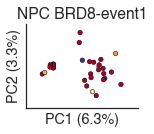

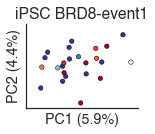

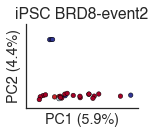

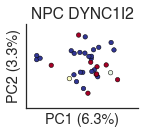

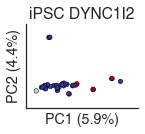

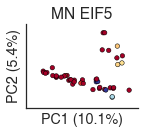

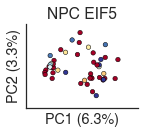

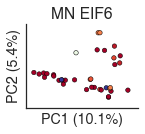

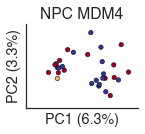

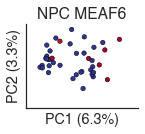

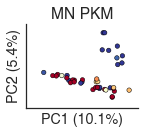

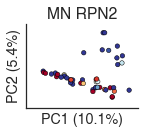

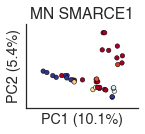

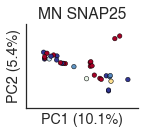

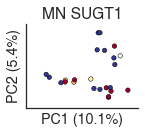

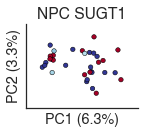

In [75]:
for i, row in splicing_corr_phenotypes.iterrows():
    
    phenotype = row['phenotype']
    splicing_gene = row['Splicing Gene']
    
    fig, ax = plt.subplots(figsize=(2, 1.5))
    
    psi = splicing_to_correlate[row['Splicing Gene']].dropna()
#     psi = splicing_to_correlate[splicing_gene].fillna(-1)
    samples = study.sample_subset_to_sample_ids(phenotype)
    samples = psi.index & samples
    psi = psi[samples]
#     colors = cmap(psi)

    smushed = smushed_phenotype.query('phenotype == @phenotype')
    smushed = smushed.set_index('sample_id')
    
    pca = pcas[phenotype]
    percent_explained = 100 * pca.explained_variance_ratio_
    xlabel = 'PC1 ({:.1f}%)'.format(percent_explained[0])
    ylabel = 'PC2 ({:.1f}%)'.format(percent_explained[1])
    
    ax.scatter(smushed.loc[psi.index, 0], smushed.loc[psi.index, 1], 
               c=psi.values, cmap=cmap, vmin=0, vmax=1, linewidths=0.5, s=20)
    ax.set(title='{phenotype} {splicing_gene}'.format(phenotype=phenotype, splicing_gene=splicing_gene), 
           xticks=[], yticks=[], xlabel=xlabel, ylabel=ylabel)
#     ax.locator_params(nbins=3)
    sns.despine()
    fig.savefig('{folder}/{phenotype}_pca_colored_by_{splicing_gene}_psi.pdf'.format(
            phenotype=phenotype, splicing_gene=splicing_gene, folder=figure_folder))

BRD8-event1 NPC (117, 8)
BRD8-event1 iPSC (198, 8)
BRD8-event2 iPSC (632, 8)
DYNC1I2 NPC (195, 8)
DYNC1I2 iPSC (567, 8)
EIF5 MN (193, 8)
EIF5 NPC (1, 8)
EIF6 MN (31, 8)
MDM4 NPC (32, 8)
MEAF6 NPC (69, 8)
PKM MN (220, 8)
RPN2 MN (18, 8)
SMARCE1 MN (266, 8)
SNAP25 MN (59, 8)
SUGT1 MN (386, 8)
SUGT1 NPC (27, 8)


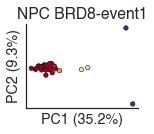

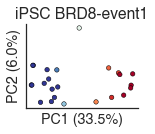

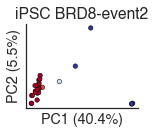

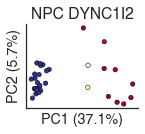

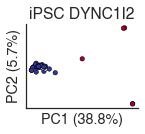

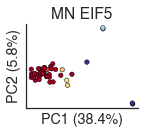

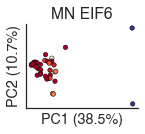

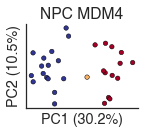

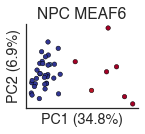

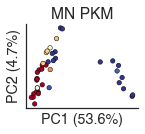

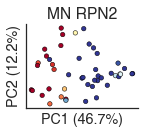

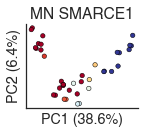

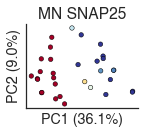

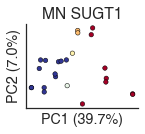

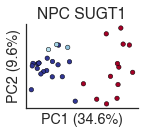

In [76]:
correlated_smusheds = {}

for (splicing_gene, phenotype), df in splicing_expression_corr_tidy.groupby(['Splicing Gene', 'phenotype']):
    print(splicing_gene, phenotype, df.shape)
    if df.shape[0] < 2:
        continue
    psi = splicing_to_correlate[splicing_gene].dropna()
    samples = study.sample_subset_to_sample_ids(phenotype)
    samples = psi.index & samples
    psi = psi[samples]
#     colors = cmap(psi)
    
    subset = single_expression.loc[samples, df['Expression Gene']]
    
    pca = PCA(n_components=2)
    smushed = pd.DataFrame(pca.fit_transform(subset), index=subset.index)
    correlated_smusheds[(splicing_gene, phenotype)] = smushed
    
    percent_explained = 100 * pca.explained_variance_ratio_
    xlabel = 'PC1 ({:.1f}%)'.format(percent_explained[0])
    ylabel = 'PC2 ({:.1f}%)'.format(percent_explained[1])

    fig, ax = plt.subplots(figsize=(2, 1.5))
    ax.scatter(smushed.loc[psi.index, 0], smushed.loc[psi.index, 1], 
               c=psi.values, cmap=cmap, vmin=0, vmax=1, linewidths=0.5, s=20)
    ax.set(title='{phenotype} {splicing_gene}'.format(phenotype=phenotype, splicing_gene=splicing_gene),
           xticks=[], yticks=[], xlabel=xlabel, ylabel=ylabel)
    ax.locator_params(nbins=3)
    sns.despine()
    
    fig.savefig('{folder}/{phenotype}_{splicing_gene}_correlated_pca_colored_by_psi.pdf'.format(
            phenotype=phenotype, splicing_gene=splicing_gene, folder=figure_folder))